In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import random

In [4]:
# Read training dataset.
train_df = pd.read_csv('petfinder_pawpularity_data/train.csv')
print('# Number of training samples: ', len(train_df))

# Number of training samples:  9912


In [1]:
9912*0.2

1982.4

In [67]:
train_df.head(5)

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

   score_group  
0            4  
1            3  
2            2  
3            1  
4            4

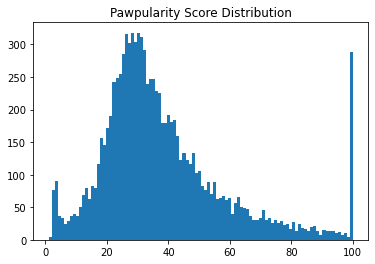

In [6]:
# Explore Pawpularity distribution
plt.hist(train_df['Pawpularity'], bins=100)
plt.title('Pawpularity Score Distribution')
plt.show()

In [18]:
# Divide images into 5 groups from low score to high score. 
def score_group_func(score):
    if score <= 20:
        return 1
    elif score <= 40:
        return 2
    elif score <= 60:
        return 3
    elif score <= 80:
        return 4
    else:
        return 5

train_df['score_group'] = train_df['Pawpularity'].apply(score_group_func)

In [21]:
group_1 = train_df[train_df['score_group'] == 1]
print('# of samples in group 1: ', len(group_1))
group_2 = train_df[train_df['score_group'] == 2]
print('# of samples in group 2: ', len(group_2))
group_3 = train_df[train_df['score_group'] == 3]
print('# of samples in group 3: ', len(group_3))
group_4 = train_df[train_df['score_group'] == 4]
print('# of samples in group 4: ', len(group_4))
group_5 = train_df[train_df['score_group'] == 5]
print('# of samples in group 5: ', len(group_5))

# of samples in group 1:  1417
# of samples in group 2:  5119
# of samples in group 3:  2088
# of samples in group 4:  727
# of samples in group 5:  561


In [74]:
# Show images in each group
def show_images(group, n_samples=10):
    fig = plt.figure(figsize=(20, 8))
    images = random.sample(list(group['Id']), n_samples)
    for i, id in enumerate(images):
        ax = fig.add_subplot(2, 5, i+1)
        im = Image.open(f'train/{id}.jpg')
        plt.imshow(im)

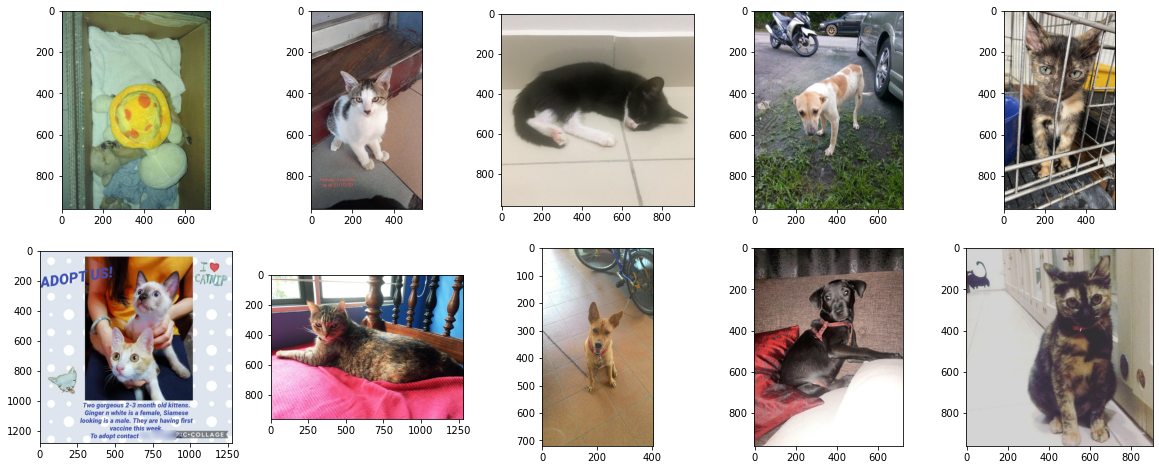

In [94]:
show_images(group_1)

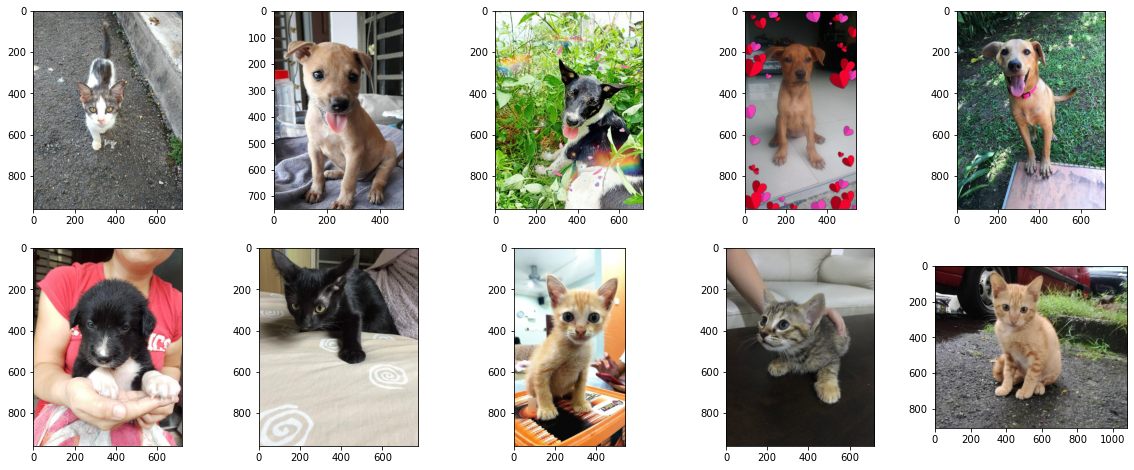

In [96]:
show_images(group_2)

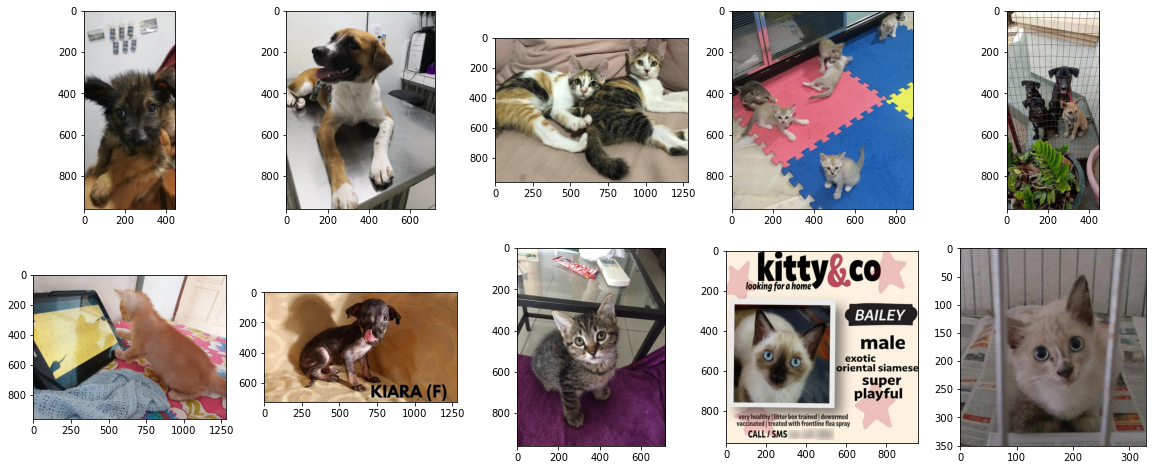

In [82]:
show_images(group_3)

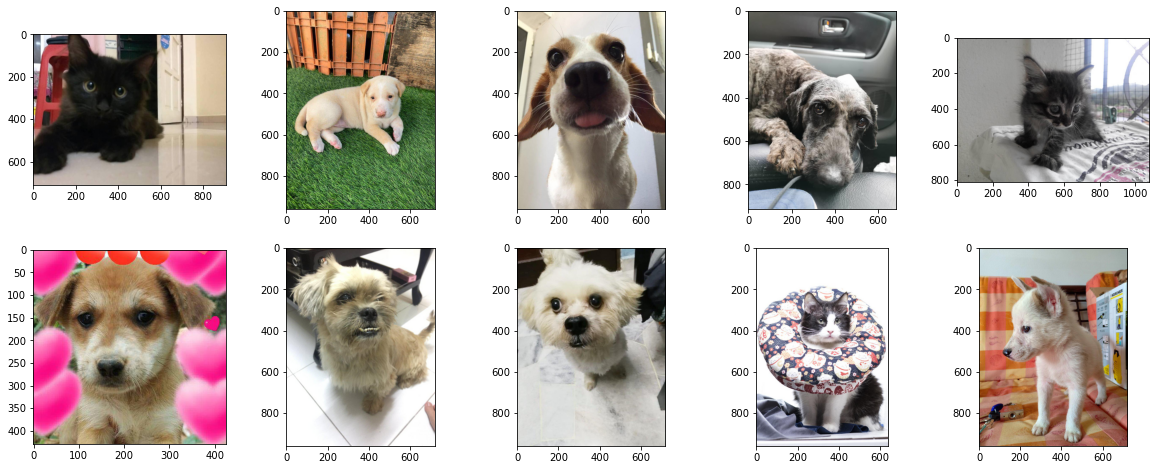

In [98]:
show_images(group_4)

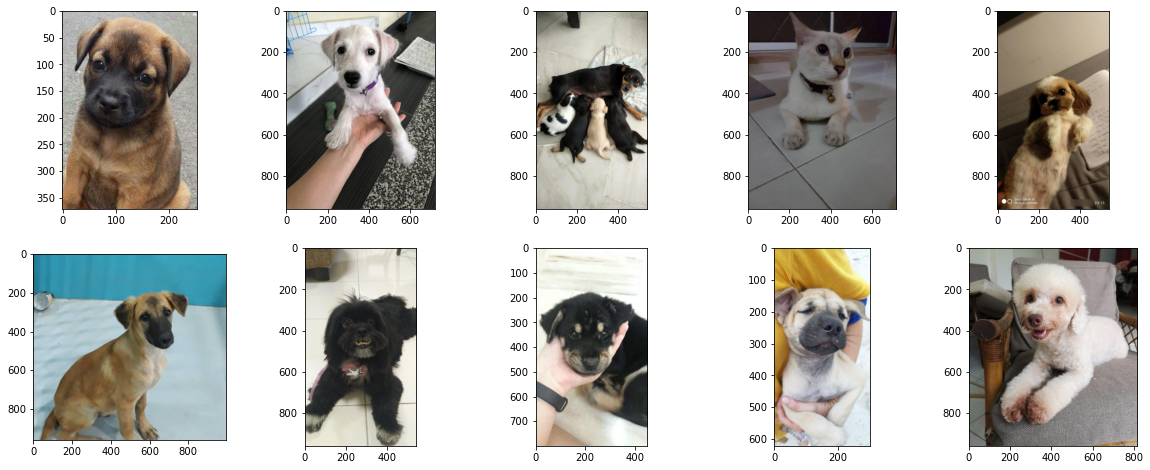

In [97]:
show_images(group_5)

### Subject Focus

In [123]:
def stacked_bar_count_and_stacked_bar_normalize(x, y, data, figsize=(15,5)):
    fig = plt.figure(figsize=figsize)
    
    # 1. create a stack bar showing the number of customers for each category
    ax1 = fig.add_subplot(1, 2, 1)
    crosstab_left_plot = pd.crosstab(data[x], data[y])
    crosstab_left_plot.plot(kind='bar', stacked=True, ax=ax1)
    ax1.tick_params(axis='x', rotation=0)
    ax1.set_title(f'The number of samples in each group label of {y}')
    #sns.countplot(x = train[x], hue=y, data=train, ax=ax1)
    
    for i in ax1.patches:
        # Find where everything is located
        height = i.get_height()
        width = i.get_width()
        x_loc = i.get_x()
        y_loc = i.get_y()

        # The width of the bar is also not pixels, it's the
        # number of animals. So we can use it as the label!
        label_text = "%.f"%height

        # ax.text(x, y, text)
        label_x = x_loc + width / 2
        label_y = y_loc + height / 2
        ax1.text(label_x, label_y, label_text, ha='center', va='center')
    
    # 2. create a stack bar normalized
    # create a crosstab for two variables
    crosstab_right_plot = pd.crosstab(data[x], data[y], normalize='index')*100
    
    # plot the stacked bar chart
    ax2 = fig.add_subplot(1, 2, 2)
    crosstab_right_plot.plot(kind='bar', stacked=True, ax=ax2)
    ax2.tick_params(axis='x', rotation=0)
    ax2.set_title(f'The percentage of pets in each group label of {y}')
    
    for n in ax2.patches:
        # Find where everything is located
        height = n.get_height()
        width = n.get_width()
        x_loc = n.get_x()
        y_loc = n.get_y()

        # The width of the bar is also not pixels, it's the
        # number of animals. So we can use it as the label!
        label_text = str(round(height, 1)) + '%'

        # ax.text(x, y, text)
        label_x = x_loc + width / 2
        label_y = y_loc + height / 2
        ax2.text(label_x, label_y, label_text, ha='center', va='center')

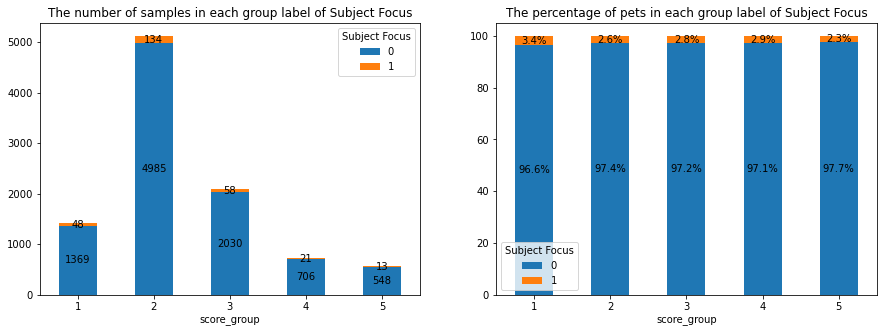

In [124]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Subject Focus', train_df, figsize=(15,5))

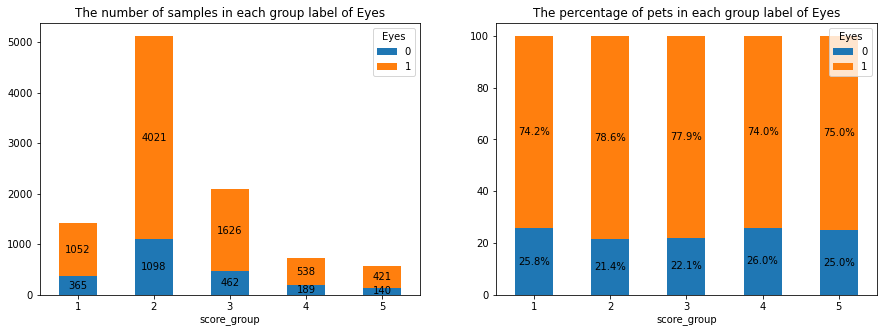

In [126]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Eyes', train_df, figsize=(15,5))

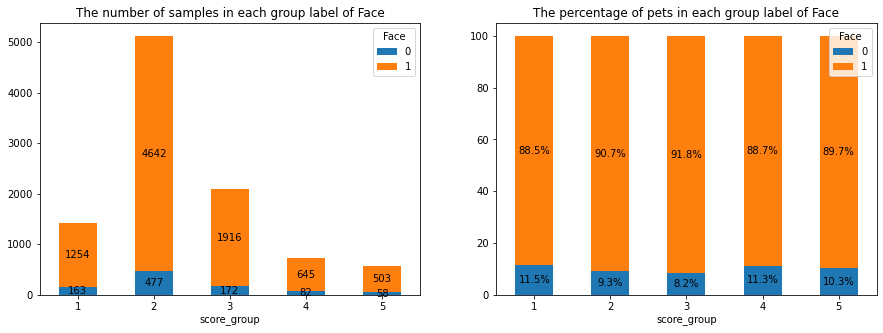

In [127]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Face', train_df, figsize=(15,5))

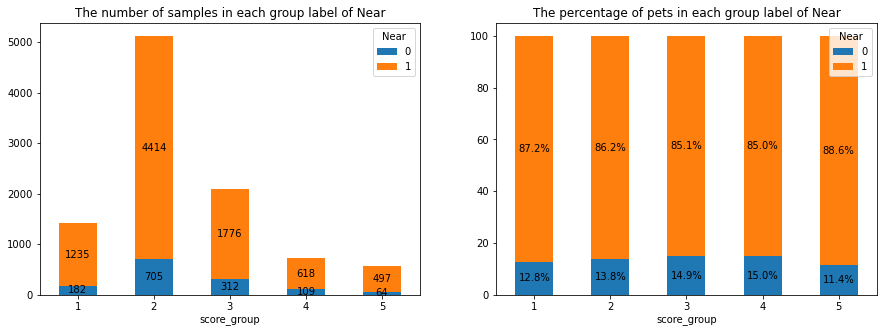

In [128]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Near', train_df, figsize=(15,5))

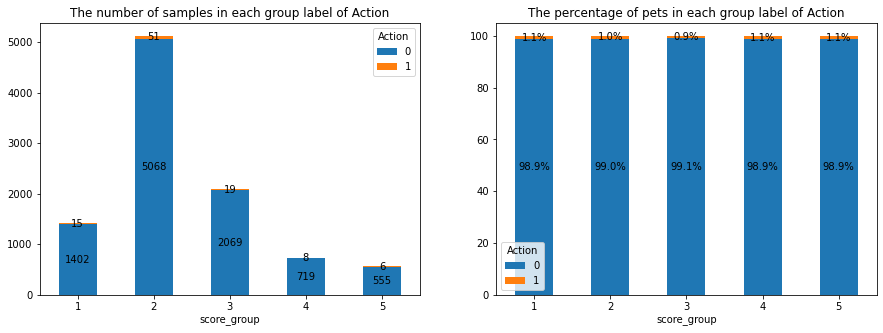

In [129]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Action', train_df, figsize=(15,5))

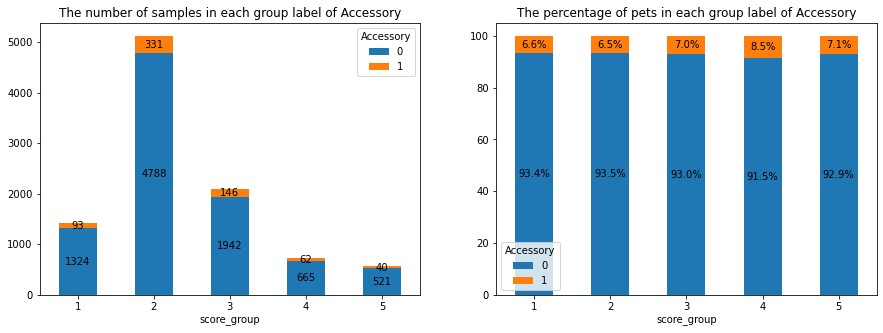

In [130]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Accessory', train_df, figsize=(15,5))

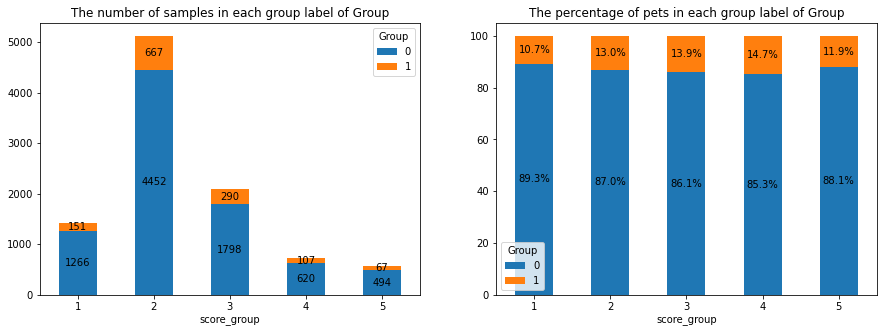

In [131]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Group', train_df, figsize=(15,5))

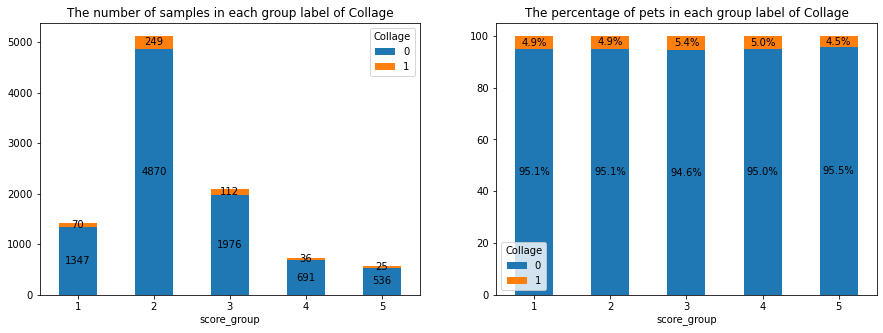

In [132]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Collage', train_df, figsize=(15,5))

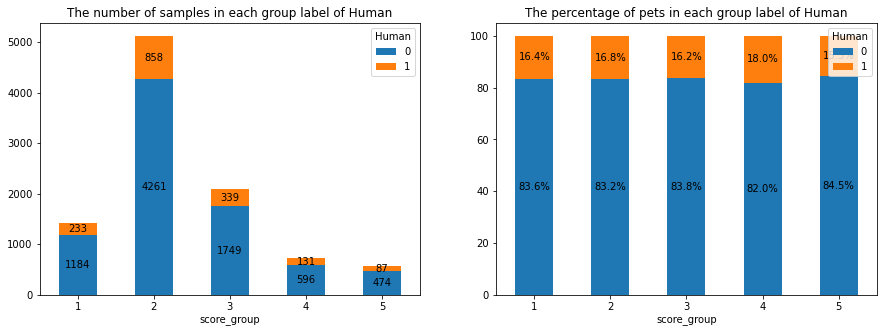

In [133]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Human', train_df, figsize=(15,5))

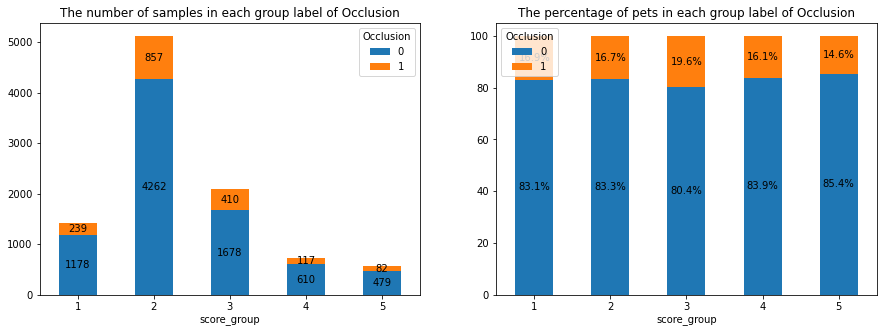

In [134]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Occlusion', train_df, figsize=(15,5))

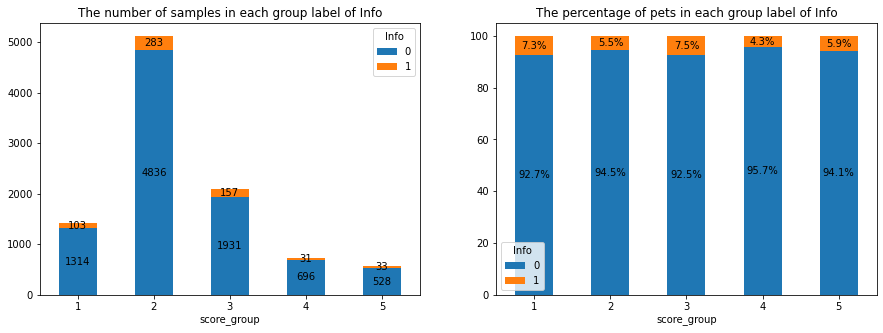

In [135]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Info', train_df, figsize=(15,5))

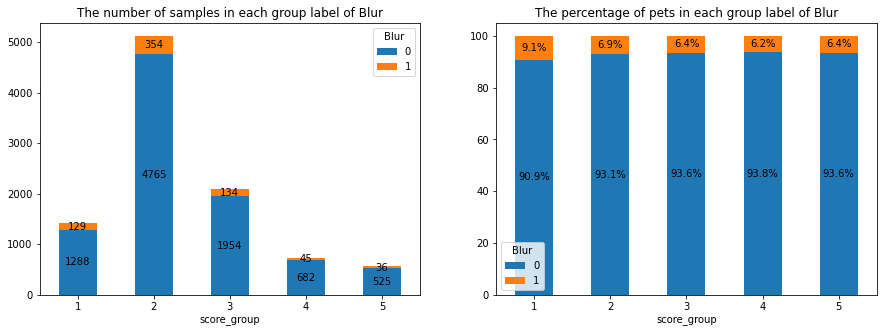

In [136]:
stacked_bar_count_and_stacked_bar_normalize('score_group', 'Blur', train_df, figsize=(15,5))

According to the plots, we can make some observations:
- Blur: Group 1 has the largest number of out-of-focus samples.
- Occulusion: Group 5 has the lowest number of images having undesirable objects. 

## Aspect ratio

In [153]:
def get_width_height(id):
    im = Image.open(f'train/{id}.jpg')
    w, h = im.size
    ans = (w, h)
    return ans

train_df['im_size'] = train_df['Id'].apply(get_width_height)
train_df['im_width'] = train_df['im_size'].apply(lambda x:x[0])
train_df['im_height'] = train_df['im_size'].apply(lambda x:x[1])

Text(0, 0.5, 'height')

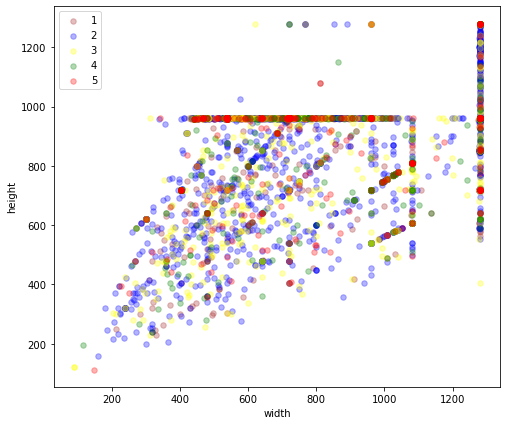

In [198]:
fig, ax = plt.subplots(figsize=(8, 7))
groups = [1, 2, 3, 4, 5]
color = ['brown', 'blue', 'yellow', 'green' ,'red']
for i, group in enumerate(groups):
    x = train_df[train_df['score_group'] == group]['im_width']
    y = train_df[train_df['score_group'] == group]['im_height']
    ax.scatter(x, y, c=color[i], label=group, alpha=0.3, s=30)
    ax.legend()
ax.set_xlabel('width')
ax.set_ylabel('height')